In [1]:
import pandas as pd
import random
import GSA
import numpy as np
from sklearn import model_selection

In [2]:
dataset = pd.read_csv('NN_GSA_Treinamento.dat',sep=' ', skipinitialspace=True)
X = dataset.iloc[:, :].values
Y = dataset.iloc[:, 2].values
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)
for x in x_train:
    x[2] = -1

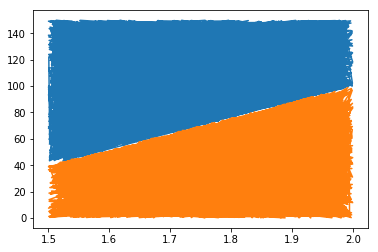

In [3]:
homem = []
mulher = []
for x in dataset.values:
    if x[2] == 1:
        homem.append(np.array([x[0],x[1],-1]))
    else:
        mulher.append(np.array([x[0],x[1],-1]))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([x[0] for x in homem],[x[1] for x in homem])
plt.plot([x[0] for x in mulher],[x[1] for x in mulher])
plt.show()

In [4]:
def sinal(u):
    return 1 if u>=0 else -1
def perceptron_fit(w):
    y = np.array([sinal(sum(data)) for data in x_train * w])
    erro = 0
    u = y - y_train
    
    return sum(u*u)

In [5]:
obj = GSA.GSA()
obj.gsa(3,perceptron_fit,NStopMax=1000)


In [6]:
obj.X_Min

array([-1.23184998,  0.01782986, -0.89142416])

In [7]:
obj.func_Min

1420

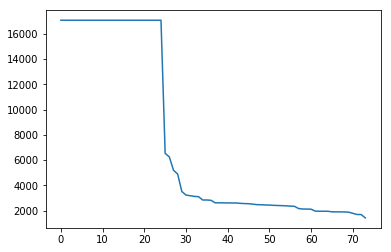

In [8]:
plt.plot([x for x in range(len(obj.conv_func))],obj.conv_func)
plt.show()

In [9]:
def perceptron_acc(x,y,w):
    y_val = np.array([sinal(sum(data)) for data in x * w])
    total = 0
    for data in y_val == y:
        if data:
            total += 1   
    
    acc = total/len(x)

    
    return y_val, acc


In [10]:
y_test_val, acc_test = perceptron_acc(x_train,y_train,obj.X_Min)

In [11]:
acc_test

0.955619452431554

In [13]:
A = 1.9      # ALTURA
P = 50     # PESO

s = sinal(sum(np.array([A,P,-1])*obj.X_Min))
{1:'Homem!',-1:'Mulher!'}[s]

'Mulher!'